# Antes de empezar:
- git pull

Entorno de trabajo minimo:
- conda env create -f mllab.yml
- mllab.yml es un archivo que contiene el listado de paquetes para instalar
- fue generado con el comando:
conda env export > mllab.yml
- Ejecutar: source activate mllab

# Aplicaciones:
* Localización (Filtros de Histogramas) [Ver Notebook](./Localizacion.ipynb)
* Clasificacion (Naive Bayes) [Ver Notebook](./Naive_Bayes.ipynb)
    * Document classification
    * Detección de SPAM
    * Detectar autor

# Técnicas
* Filtros de histogramas (Histogram Filters)
* Naive Bayes

# Background teórico necesario
* Probabilidad conjunta, condicional, marginal
* Teorema de Bayes
* Función de masa de probabilidad y distribución de probabilidad
* Independencia
* Variables Aleatorias Gaussianas

# Herramientas
* Listas y diccionarios en **Python**
* Operaciones con arreglos en **Numpy**
* **Sklearn**: Vectorizers y NB
* Sparse matrices
* T-SNE

# Referencias:
- Localización: https://classroom.udacity.com/courses/cs373/lessons/48739381/concepts/487122860923
- Naive Bayes: https://classroom.udacity.com/courses/ud120/lessons/2254358555/concepts/30076485360923
- sklearn Naive Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
- Numpy: https://docs.scipy.org/doc/numpy/index.html

# Introducción a la probabilidad

La probabilidad es una herramienta de ayuda para la toma de decisiones porque proporciona una forma de medir, expresar y analizar las incertidumbres asociadas con eventos futuros de razones entre el número de casos favorables y el número de casos posibles.


## ¿Qué es probabilidad? 

Es una medida numérica de la posibilidad de que ocurrirá un evento en la que sus valores se asignan en una escala de 0 a 1.

## Experimento y espacio muestral

* Experimento: es como cualquier proceso que pueda generar uno de un conjunto de resultados bien definidos. Ejemplo: lanzar una moneda.  
* Espacio muetral: es el conjunto de todos los resultados que pueda suceder. Ejemplo: cara o cruz  

La probabilidad de un resultado experimental es resultado posible que ocurra.   
Se deben satisfacer dos requerimientos de probabilidad:  

1. Los valores de las probabilidades asignados. (0<=P(Ei) <=1)  
2. La suma de los posibles resultados experimentales debe ser 1 .(P(Ei)+P(E2)+…….P(EK)=1)  

<img src="probabilidad.gif" alt="Probabilidad">

# Ejemplo Dado:
D1 es una variable aleatoria

D1 = Resultado de lanzar dado 1

**Como se define formalmente una V.A?**

Mapea los resultados de un experimento al eje real

**Otros ejemplos**
- Moneda con cara o seca
- Señal de audio
- Imagen
- ECG
- Textos

## Espacio muestral

Cual es el espacio muestral de D1?   
Cual es el espacio muestral de el ejemplo de la moneda?


Cual es la probabilidad de cada cara del dado? y de la moneda?

**¿como simulamos en python el lanzamiento del dado o de la moneda?**

In [1]:
import numpy as np

In [22]:
np.random.randint(1,7)

2

In [23]:
def tirar_dado_lista(cantidad_de_tiradas = 50):
    cantidad_de_caras = 6
    resultados = []
    for i in range(cantidad_de_tiradas):
        # Notar que le sumo uno por que randint(N) va desde 0 hasta N-1
        d1 = np.random.randint(cantidad_de_caras) + 1
        resultados.append(d1)    
    return resultados

In [24]:
tirada_dados_lista = tirar_dado_lista(50)

In [25]:
print(tirada_dados_lista)

[1, 4, 6, 3, 1, 6, 3, 5, 3, 4, 5, 4, 1, 1, 2, 2, 2, 4, 5, 6, 1, 3, 5, 5, 6, 3, 5, 2, 2, 4, 2, 4, 6, 5, 3, 4, 4, 4, 4, 6, 5, 1, 2, 6, 6, 4, 3, 6, 6, 4]


** Ejercicio: Hacer un metodo de python que devuelva en una lista los resultados de tirar el dado N veces **

In [26]:
def tirar_dado_array(N=50):
    # Notar que randint cambia y ahora si tiene primer parametro, el segundo es el maximo -1 
    # y el primero es el minimo. El tercero es la cantidad
    return np.random.randint(1, 7, N)

In [27]:
tirada_dado_array = tirar_dado_array()

In [28]:
print(tirada_dado_array)
print(tirada_dados_lista)

[6 2 2 3 6 1 1 5 3 2 5 6 4 5 3 5 3 3 2 2 6 5 2 2 6 2 5 3 4 3 4 3 6 4 2 2 4
 3 4 1 2 4 1 4 4 6 1 5 4 4]
[1, 4, 6, 3, 1, 6, 3, 5, 3, 4, 5, 4, 1, 1, 2, 2, 2, 4, 5, 6, 1, 3, 5, 5, 6, 3, 5, 2, 2, 4, 2, 4, 6, 5, 3, 4, 4, 4, 4, 6, 5, 1, 2, 6, 6, 4, 3, 6, 6, 4]


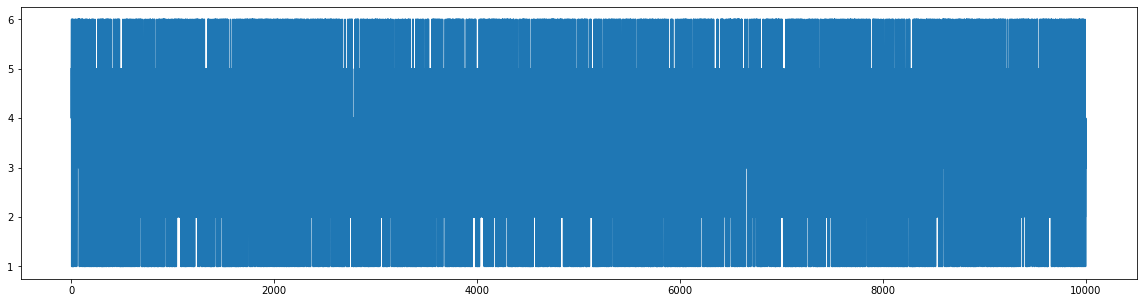

In [34]:
from matplotlib import pyplot as plt
tirada_de_dados = tirar_dado_array(10000)
plt.figure(figsize=(20,5))
plt.plot(tirada_de_dados)
plt.show()

In [35]:
1/6

0.16666666666666666

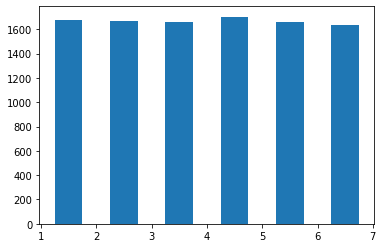

In [36]:
plt.hist(tirada_de_dados, bins=6, range=(1,7), rwidth=0.5)
plt.show()

** Algunas posibilidades con python **

In [37]:
(tirada_de_dados == 3).sum()

1657

In [38]:
cant = 0
for i in tirada_de_dados:
    if i == 1:
        cant = cant + 1
print(cant)

1679


In [39]:
len(tirada_de_dados)

10000

In [40]:
histog = []
espacio_muestral_d1 = [1,2,3,4,5,6]
for d1 in espacio_muestral_d1:
    histog.append((tirada_de_dados == d1).sum())

In [41]:
np.array(histog)/len(tirada_de_dados)

array([0.1679, 0.1669, 0.1657, 0.1704, 0.1658, 0.1633])

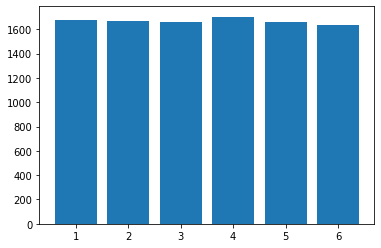

In [42]:
plt.bar(espacio_muestral_d1, histog)
plt.show()

## Probabilidad

El histograma podría utilizarse como una aproximación de la distrubución de probabilidad

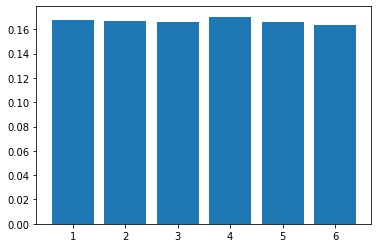

0.16666666666666666


In [43]:
plt.bar(espacio_muestral_d1, np.array(histog)/len(tirada_de_dados))
plt.show()
print(1/6)

## Media, varianza y desvio estandar

In [44]:
tirada_de_dados.mean(), tirada_de_dados.var(), tirada_de_dados.std()

(3.4892, 2.90248336, 1.703667620165389)

In [45]:
# Desviación media. Raramente usada. La STD por estar al cuadrado, pesa mas las muestras mas lejanas
abs(tirada_de_dados - tirada_de_dados.mean()).sum()/len(tirada_de_dados)

1.4950892

** Guardado de datos en python **

In [46]:
np.save('tirada_dados',tirada_de_dados)

In [47]:
tirada_de_dados = np.load('tirada_dados.npy')

In [48]:
tirada_de_dados

array([5, 4, 6, ..., 4, 4, 3])

## Otros ejemplos practicos

In [53]:
folder = './'
images = np.load(folder+'train_images.npy')
labels = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)

In [54]:
print(images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

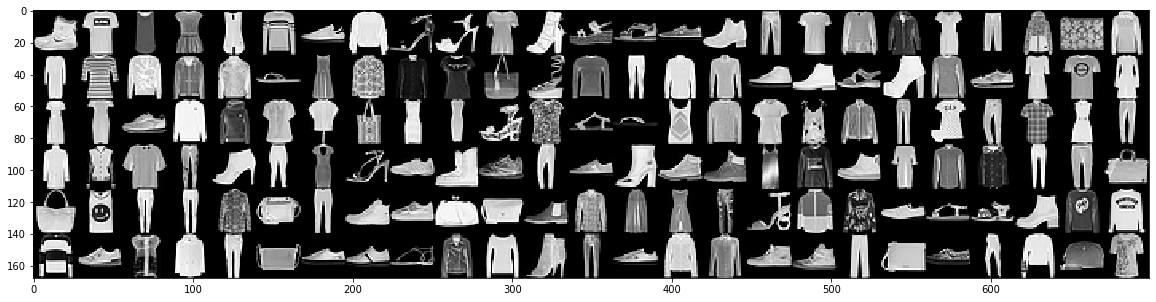

In [55]:
from MNIST_helper import plot_numbers
plot_numbers(images.reshape(-1,28,28),range(150), columns=25, figsize=(20, 20))

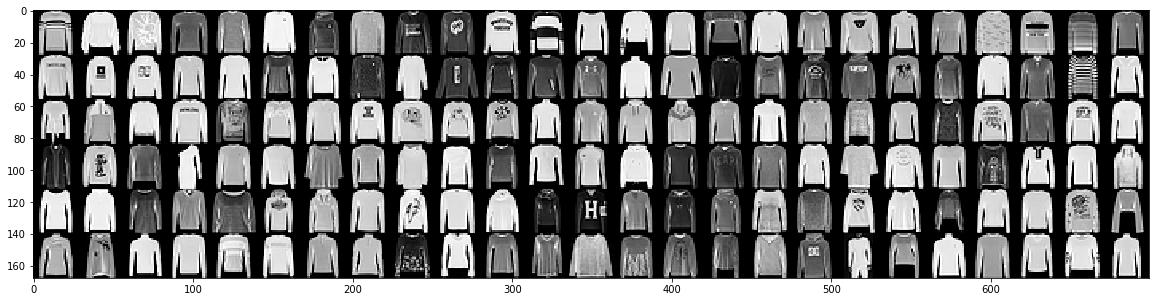

In [56]:
buzos = images[labels == 2]
plot_numbers(buzos.reshape(-1,28,28),range(150), columns=25, figsize=(20, 20))

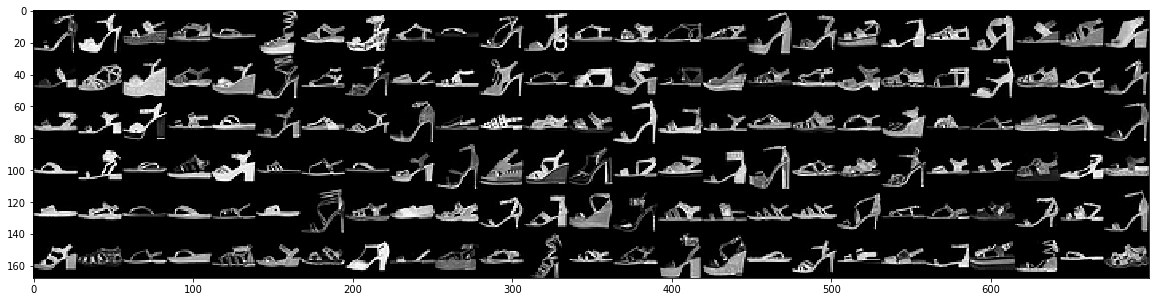

In [57]:
sandalias = images[labels == 5]
plot_numbers(sandalias.reshape(-1,28,28),range(150), columns=25, figsize=(20, 20))

In [58]:
np.save('sandalias.npy', sandalias)
np.save('buzos.npy', buzos)

In [59]:
784*256

200704

## Histograma de color

### Para buzos

In [60]:
buzos.reshape(-1).shape

(4704000,)

In [61]:
hist_buzos, indexes = np.histogram(buzos.reshape(-1), range=(0,256), bins=256)

In [62]:
hist_buzos[0]=0

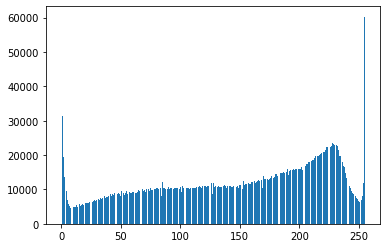

In [63]:
plt.bar(range(256), hist_buzos)
plt.show()

### Para sandalias

In [64]:
hist_sandalias, indexes = np.histogram(sandalias.reshape(-1), range=(0,256), bins=256)

In [65]:
hist_sandalias[0]=0

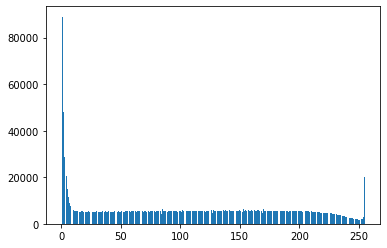

In [66]:
plt.bar(range(256), hist_sandalias)
plt.show()

### Histograma de un punto de la imagen
Buzos

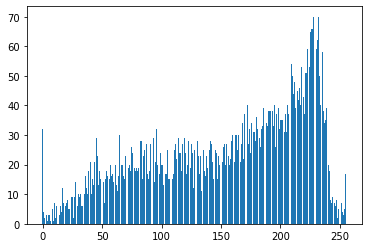

In [67]:
buzos_point = buzos[:,14,14]
hist_buzos_point, indexes = np.histogram(buzos_point.reshape(-1), range=(0,256), bins=256)
plt.bar(range(256), hist_buzos_point)
plt.show()

Sandalias

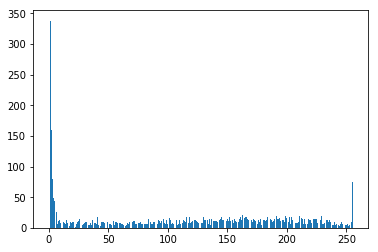

In [44]:
sand_point = sandalias[:,14,14]
hist_sand_point, indexes = np.histogram(sand_point.reshape(-1), range=(0,256), bins=256)
hist_sand_point[0]=0
plt.bar(range(256), hist_sand_point)
plt.show()

Una pregunta que nos podríamos hacer:  
Dado que observamos un pixel de una images y nos da 0. Que diriamos que es mas probable?:  
- buzo
- sandalia

Cual es la probabilidad de que sea una sandalia dado que observamos el punto 14,14 y da 0?

## Ejemplo de suma y resta de dados

D1 = Resultado de lanzar dado 1

D2 = Resultado de lanzar dado 2

S = D1 + D2

R = |D1 - D2|

S y R son variables aleatorias

In [45]:
S = {}
R = {}
Conjunta = {}
EspacioMuestral = []
for D1 in range(1,7):
    for D2 in range(1,7):
        # El espacio muestral esta formado por todas las combinaciones posibles de la salida de los
        # dados D1 y D2
        EspacioMuestral.append((D1,D2))
        suma = D1+D2
        resta = abs(D1 - D2)
        # Inicializo en cero si la suma o la resta no existen en el diccionario
        if suma not in S:
            S[suma] = 0
        if resta not in R:
            R[resta] = 0
        if (suma, resta) not in Conjunta:
            Conjunta[(suma, resta)] = 0
        # Sumo uno a los que corresponda
        S[suma] = S[suma] + 1
        R[resta] = R[resta] + 1
        Conjunta[(suma, resta)] = Conjunta[(suma, resta)] + 1

## Independencia probabilistica

¿ $P(D1, D2) = P(D1) P(D2)$ ? por que?

$ P(A \cap B) = P(A) P(B) $

¿Cuál es la probabilidad de tirar dos veces un dado y que salga primero un 3 y después un 1?

**Nota Importante: Por claridad no se dividio nada por 36. Para que sea formalemente correcto, todos los valores enteros de las V.A tienen que estar divididos por 36 **

In [46]:
print('Espacio Muestral de D1 y D2:')
print(EspacioMuestral)
print('Cantidad de elementos del espacio muestral:', len(EspacioMuestral))
print()
print('V.A. S:')
print(S)
print()
print('V.A. R:')
print(R)

Espacio Muestral de D1 y D2:
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
Cantidad de elementos del espacio muestral: 36

V.A. S:
{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}

V.A. R:
{0: 6, 1: 10, 2: 8, 3: 6, 4: 4, 5: 2}


In [47]:
print('Dominio de S')
print(list(S.keys()))
print()
print('Dominio de R')
print(list(R.keys()))

Dominio de S
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Dominio de R
[0, 1, 2, 3, 4, 5]


### Ley de la adición:  

$ P(A \cup B) = P(A) + P(B) - P(A \cap B) $

## Probabilidades Marginales
Se ubica a los márgenes de la tabla de probabilidad conjunta y brinda la probabilidad de cada evento por separado. 

Formalmente:  

$P(S=5) = \frac{4}{36} \quad P(R=3) = \frac{6}{36}$

In [48]:
## Con python
print(S[5]/len(EspacioMuestral))
print(R[3]/len(EspacioMuestral))

0.1111111111111111
0.16666666666666666


In [49]:
from matplotlib import pyplot as plt

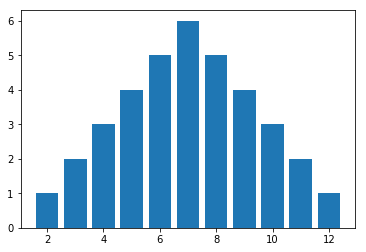

In [50]:
plt.bar(list(S.keys()), list(S.values()))
plt.show()

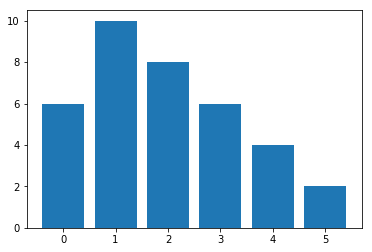

In [51]:
plt.bar(list(R.keys()), list(R.values()))
plt.show()

## Probabilidad Conjunta

La que da la probabilidad de la intersección de dos eventos. La tabla de probabilidad conjunta proporciona un resumen de la información de probabilidad. 

In [52]:
print(' ', ','.join('{0:2d}'.format(e) for e in list(S.keys())))
for r in R.keys():
    l = []
    for s in S.keys():
        if (s,r) in Conjunta:
            l.append(Conjunta[(s,r)])
        else:
            l.append(0)
    print(r, l, np.array(l).sum())
print('___________________________________')
print(' ',list(S.values()))

   2, 3, 4, 5, 6, 7, 8, 9,10,11,12
0 [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1] 6
1 [0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0] 10
2 [0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0] 8
3 [0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0] 6
4 [0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0] 4
5 [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0] 2
___________________________________
  [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]


$P(S=3, R = 1)$ = ?

Cuales son los elementos?

## Condicionales

¿ $P(R,S) = P(R) P(S)$ ?

$P(R | S) = \large \frac{P(R, S)}{P(S)}$

Ejemplo: (Resolverlo mirando la tabla de la conjunta)

$P(R | S=7) = \large \frac{P(R, S=7)}{P(S=7)}$

In [53]:
Conjunta

{(2, 0): 1,
 (3, 1): 2,
 (4, 0): 1,
 (4, 2): 2,
 (5, 1): 2,
 (5, 3): 2,
 (6, 0): 1,
 (6, 2): 2,
 (6, 4): 2,
 (7, 1): 2,
 (7, 3): 2,
 (7, 5): 2,
 (8, 0): 1,
 (8, 2): 2,
 (8, 4): 2,
 (9, 1): 2,
 (9, 3): 2,
 (10, 0): 1,
 (10, 2): 2,
 (11, 1): 2,
 (12, 0): 1}

In [54]:
sum(Conjunta.values())

36

{5: 0.3333333333333333, 3: 0.3333333333333333, 1: 0.3333333333333333}


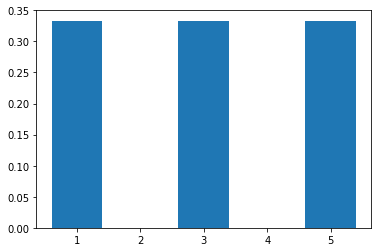

In [55]:
S0 = 7 # Condición (Cambiarla a otros valores)
P_cond = {}
for k,v in Conjunta.items():
    if k[0]==S0: # Cuando estoy en la columna 
        P_cond[k[1]] = (v/36)/(S[S0]/36) # Valor del elemento en la columna dividido Marginal en S0
print(P_cond)
plt.bar(list(P_cond.keys()), list(P_cond.values()))
plt.show()

### Respondamos la pregunta de la sandalia y el buzo
Dado que observo un cero en la posición 14,14, que es mas probable. Un buzo o una sandalia?

$ P(Sandalia \ |\  color_{14,14} = 0) = \large \frac{P(color_{14,14} = 0\ |\ Sandalia) P(Sandalia)}{P(color_{14,14} = 0)}$

$ P(Buzo \ |\  color_{14,14} = 0) = \large \frac{P(color_{14,14} = 0\ |\ Buzo) P(Buzo)}{P(color_{14,14} = 0)}$

Necesito saber $P(color_{14,14} = 0)$ para resolver el problema?

## Likelihood

### Ejemplo Maximum Likelihood

Dado que observo que el modulo de la resta de los dos dados ($R$) es 1 y tengo que apostar por cuanto vale la suma, cual sería la mejor apuesta:  

$P(R = 1|S = k)$

In [56]:
R0 = 1
P_likelihood = {}
for k,v in Conjunta.items():
    if k[1]==R0: # Verifico si la resta es 1
        P_likelihood[k[0]] = (v/36)/(S[k[0]]/36)
P_likelihood

{3: 1.0, 5: 0.5, 7: 0.3333333333333333, 9: 0.5, 11: 1.0}

Si observo que la suma es 7 cual es la mejor apuesta para la suma?

$P(S = 7|R = k)$

In [57]:
S0 = 7
P_likelihood = {}
for k,v in Conjunta.items():
    if k[0]==S0: # Verifico si la resta es 1
        P_likelihood[k[1]] = (v/36)/(R[k[1]]/36)
P_likelihood

{1: 0.19999999999999998, 3: 0.3333333333333333, 5: 1.0}

### Cual es el likelihood de la sandalia para el punto 14,14?

# Bayes

$ \large P(S=k|X) = \huge \frac{P(X|S=k)P(S=K)}{\sum_i{P(X|S_i)P(S_i)}}$

$\large Posteriori = \huge \frac{Likelihood \quad x \quad Priori}{Normalización}$